<a href="https://colab.research.google.com/github/jcandane/PhysicsI_Labs/blob/main/phy122_lab7t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title of Work

Name

Date

#   <font color='Green'> **Setup** </font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

π   = np.pi
π50 = "3.14159265358979323846264338327950288419716939937510" ## π to 50 places

testA = "10.123090"
testB = "112500.0000"
testC = "0.075"
testD = "0075"
testE = "0075.00"
testF = "001234500.001564030000"

def VelocityVerletRot(T, R, v, datatype=np.float32):
    """ Rotational Velocity Verlet trajectory & Kinetic Energy
    for Time-array T, Radius R, and speed v (with object of mass 1 kg) """

    Δt  = datatype(T[1] - T[0])
    x_t = np.zeros((len(T),3), dtype=datatype)
    v_t = np.zeros((len(T),3), dtype=datatype)
    K_t = np.zeros((len(T)), dtype=datatype)

    x_t[0] = datatype(R) * np.array([1., 0., 0.])
    v_t[0] = datatype(v) * np.array([0., 1., 0.])
    K_t[0] = datatype( 1.0 * np.dot( v_t[0], v_t[0]) / 2 )
    a_told = datatype( -np.dot( v_t[0], v_t[0]) / (np.linalg.norm(x_t[0])**2) * ( x_t[0] - np.zeros(3) ) )
    for t in range(len(T)-1):
        x_t[t+1] = x_t[t] + v_t[t] * Δt + 0.5 * a_told * (Δt*Δt) 

        a_tnew = -np.dot( v_t[t], v_t[t]) / (np.linalg.norm(x_t[t])**2) * ( x_t[t] - np.zeros(3) )

        v_t[t+1]  = v_t[t] + 0.5 * (a_told + a_tnew) * Δt 
        K_t[t+1]  = 1.0 * np.dot( v_t[t], v_t[t]) / 2 
        a_told    = a_tnew

    return K_t

def geometric_series(a, r):
    return a / (1 - r)

def nth_partial_sum(a, r, n):
    return a * ( (1 - r ** (n + 1) ) / (1 - r) )

#   <font color='Red'> **Experiment 1: Machine Precision** </font>

###   <font color='Red'> **Let's start by fitting π** </font>

#### <font color='Red'> π is a trancedental number, it does not have any known patterns, and cannot be a root of a finite polynomial (hence not algebraic). Hence it cannot be stored in a computer in its totality. </font> 

#### <font color='Red'> Return (print) the value of π for float16, float32, float64, float128, and π50 defined above (π to 50 places) . </font> 

3.14
3.1415927
3.141592653589793
3.1415926535897932385
3.14159265358979323846264338327950288419716939937510


###   <font color='Red'> **Determine Machine ϵ: for float16, float32, float64, and float128 and save them to variables (to use them later), and print them:** </font>

0.000977
1.1920929e-07
2.220446049250313e-16
1.084202172485504434e-19


###   <font color='Red'> **Limits of the Data Types** </font>

####  <font color='Red'> Print the Limits of the Data Types (max, min) for int8, int16, int32, int64, float16, float32, float64, float128: </font>

127
32767
2147483647
9223372036854775807
---------------------
65500.0
3.4028235e+38
1.7976931348623157e+308
1.189731495357231765e+4932
---------------------
-65500.0
-3.4028235e+38
-1.7976931348623157e+308
-1.189731495357231765e+4932


###   <font color='Red'> **Let's Do Bad Addition** </font>

####   <font color='Red'> Example 1: come up with a sum which **barely** cannot be properly summed for a given dataype. And show the addition is bad: </font>

10.0

####   <font color='Red'> Example 2: Purposely Cause an underflow error with exponentiation with ϵ_128 (i.e. ϵ_128 ^ N), return the integer that does this: </font>

1.5e-4950


####   <font color='Red'> Example 3: Show bad addition, the sum of two numbers in float16 datatype (i.e. A + B , with A & B in float16 with a few decimal places) </font>

2.525

#   <font color='Red'> **Experiment 2: Significant Figures** </font>

### <font color='Red'>  In physics classes often its asked find the significant figures for a number. In this section we will create a defintion, given such a number in string format, we will return the significant part of the number. </font>

#### <font color='Red'>  In python strings (words, or strings of chacter) are treated like 1-dimensional arrays, and use the same subindexing, i.e. suppose word = "qwerty", then word[2], will return the 2nd letter in variable word, i.e. "e". </font>

#### <font color='Red'>  Let's slice testE (defined in setup), between i=2 and j=7. </font>

'75.00'

#### <font color='Red'>  Clearly we may use this slicing to slice a number to its significant digits. </font>

#### <font color='Red'>  Lets make a for-loop to find the first appearance of a non-"0", i.e. get this index (save and return its value). </font>

2

#### <font color='Red'>  Lets make another for-loop to find the last appearance of a non-"0", i.e. get this index (save and return its value). </font>

5

#### <font color='Red'>  Next let's find a decimal in a string, using ".find()". </font>

2

#### <font color='Red'>  Finally, but these methods together to form a defintion and test it using the test cases above. </font>

1234500.001564030000


#   <font color='Red'> **Experiment 3: Trucating the Geometric Series** </font>

###   <font color='Red'> First Lets define the data type geometric series </font>

###   <font color='Red'> Let's define a & r in the geometric series, Do NOT forget to apply datatype to each number! </font>

###   <font color='Red'> Ensure each number is in its proper datatype! </font>

###   <font color='Red'> Now let's sum the Geometric Series $\sum_{i\in\mathbb{N}} a r^i$ </font>

3.1416206

###   <font color='Red'> When does the Geometric Series (NOT the cumlative-sum) go under ϵ_machine for each data-type? </font>

3765


###   <font color='Red'> Now let's compute the cumlative-sum, and find where the sum stops increasing (hint: use np.gradient + np.where together), what do you notice?: </font>

3765


###   <font color='Red'> Now we know the answer, and cumlative-sum, therefore we may define an error, save the **absolute-value** of this error. Let's cast the cumlative-sum into float128 and subtract it from np.float128( π50 ): </font>

###   <font color='Red'> Now plot this error in k (the terms): </font>

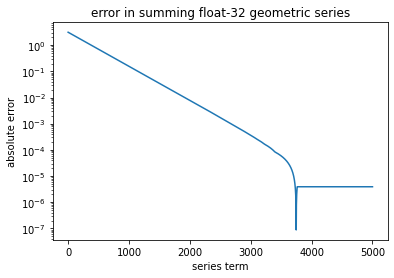

#   <font color='Red'> **Experiment 4: Test Rotational Velocity Verlet** </font>

###   <font color='Red'> Define a Time-array, T, like before with Δt, t0, and tf: </font>

###   <font color='Red'> Let's integrate the rotational motion 3 times with different datatypes (float16, float32, and float64), with the same circular radius and velocity. Save the Energy for each simulation. </font>

###   <font color='Red'> Plot the relative errors of the Energy (E_t - E_t[0]) </font>

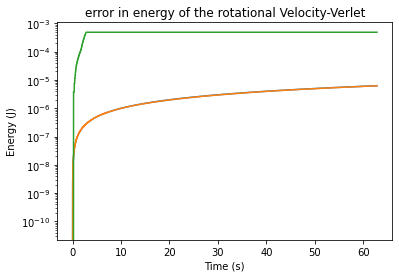

#   <font color='Red'> **Conclusion** </font>